# 8월 14일 과제

* 강사 측에서 내준 과제를 해결하는 것을 목표로 함

# 식권 사용 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import platform

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unable to acknowldege system. Maybe Linux?')
    
couponData = pd.read_excel('../data/CouponUsage.xlsx', header=2)
couponData.head()

,사용일시,Unnamed: 1,Unnamed: 2,Unnamed: 3,가맹점,가맹점업종,승인금액,식권
0,2023-10-04,11:57:13,NaN,NaN,미스사이공 고덕푸르지오점,한식 음식점업,7000,새싹강동
1,2023-10-04,11:57:43,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동
2,2023-10-04,11:58:29,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동
3,2023-10-04,11:58:31,NaN,NaN,미스사이공 고덕푸르지오점,한식 음식점업,8000,새싹강동
4,2023-10-04,11:58:44,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동


In [2]:
couponData = couponData.drop(couponData.columns[[2, 3]], axis=1)
couponData.head()

,사용일시,Unnamed: 1,가맹점,가맹점업종,승인금액,식권
0,2023-10-04,11:57:13,미스사이공 고덕푸르지오점,한식 음식점업,7000,새싹강동
1,2023-10-04,11:57:43,버거타임(BURGER TIME),양식,8000,새싹강동
2,2023-10-04,11:58:29,버거타임(BURGER TIME),양식,8000,새싹강동
3,2023-10-04,11:58:31,미스사이공 고덕푸르지오점,한식 음식점업,8000,새싹강동
4,2023-10-04,11:58:44,버거타임(BURGER TIME),양식,8000,새싹강동


In [3]:
couponData = couponData.rename(columns={couponData.columns[1]: '사용시간'})
couponData.head()

,사용일시,사용시간,가맹점,가맹점업종,승인금액,식권
0,2023-10-04,11:57:13,미스사이공 고덕푸르지오점,한식 음식점업,7000,새싹강동
1,2023-10-04,11:57:43,버거타임(BURGER TIME),양식,8000,새싹강동
2,2023-10-04,11:58:29,버거타임(BURGER TIME),양식,8000,새싹강동
3,2023-10-04,11:58:31,미스사이공 고덕푸르지오점,한식 음식점업,8000,새싹강동
4,2023-10-04,11:58:44,버거타임(BURGER TIME),양식,8000,새싹강동


In [4]:
couponData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일시    2553 non-null   object
 1   사용시간    2553 non-null   object
 2   가맹점     2553 non-null   object
 3   가맹점업종   2553 non-null   object
 4   승인금액    2553 non-null   int64 
 5   식권      2553 non-null   object
dtypes: int64(1), object(5)
memory usage: 119.8+ KB


In [5]:
couponData['가맹점'].unique()

array(['미스사이공 고덕푸르지오점', '버거타임(BURGER TIME)', '가츠몽상일역점', '덮밥장사장 상일동역점',
       '공차 상일동역점', '김밥천국', '린칭', '이디야고덕교차로', '라홍방마라탕  상일역점',
       '뜨레주르 고덕그라시움점', '이마트24 강일푸르내점', '아비꼬 상일동역점', 'GS25 고덕아르테온점',
       '본도시락 상일점', '죠스떡볶이 앤 바르다김선생 연세상일점', 'GS25 메가스퀘어점',
       '롯데리아문정로데오 주식회사', 'GS25강일리버점', '본 죽&비빔밥 상일동역점', '뚜레쥬르 상일동역',
       '만나냉면', 'KFC 개롱역점', '믿음소망사랑', '이화마라강동본점', '아향', '사누끼',
       '세븐일레븐 고덕리앤파크점', 'GS25 강일9단지점', '상희식당', '홍성원조화로구이', '다이소 상일동역점',
       '쿡희희(cookiehee)', 'GS25중구무학점', 'CU 암사상암로점', '맘마미아김밥',
       '이디야커피 고덕강일2지구점', '방이샤브샤브칼국수', '뚜레주르', 'CU 고덕2단지점', '내가 국수다',
       'GS25강남세곡점', '이삭토스트', '버거타임', '알파쇼핑', 'GS25 상일세종점', '도담한상',
       '메가커피 천호초교사거리점', '순대실록 상일동점', '파리바게트(상일동중앙점)', '프랭크버거 상일점', '마루분식',
       '이마트24 R자곡시티점', 'CU 강남자곡점', '하루엔소쿠자곡점', '차오차오(강일점)', '타피오빈',
       '두레통닭 상일점', '컴포즈커피(개포중앙점)', '우리들은', '또와분식', '굿찬', '써브웨이 상일동점',
       '권사부순대국', '이삭토스트 거여역점', '이마트24 R문정로데오점', 'CU 자곡현대점', '서브웨이 대청점',
       '맘스터치', 'GS25암사역점', '이디야', 'CU 고덕아르테온1상가점', '스탁 (St

In [6]:
couponDataSum = couponData.groupby('가맹점')['승인금액'].sum().reset_index()
couponDataSum.head()

,가맹점,승인금액
0,(일반) 롯데쇼핑 롯데몰 수원점,4700
1,(주)골드그린마트,24000
2,CU 가락점,39000
3,CU 강남자곡점,3200
4,CU 강동그라시움점,6000


In [7]:
couponDataCount = couponData['가맹점'].value_counts().reset_index()
couponDataCount.columns = ['가맹점', 'count']
couponDataCount.head()

,가맹점,count
0,덮밥장사장 상일동역점,195
1,린칭,173
2,미스사이공 고덕푸르지오점,170
3,김밥천국,160
4,아비꼬 상일동역점,143


In [8]:
store_df = pd.merge(couponDataSum, couponDataCount, on='가맹점')
store_df.head()

,가맹점,승인금액,count
0,(일반) 롯데쇼핑 롯데몰 수원점,4700,1
1,(주)골드그린마트,24000,3
2,CU 가락점,39000,5
3,CU 강남자곡점,3200,1
4,CU 강동그라시움점,6000,1


In [9]:
store_df = store_df.sort_values(by='승인금액', ascending=False)
store_df.head(10)

,가맹점,승인금액,count
67,덮밥장사장 상일동역점,1548400,195
86,린칭,1381600,173
104,미스사이공 고덕푸르지오점,1295200,170
53,김밥천국,1149180,160
144,아비꼬 상일동역점,1122900,143
173,죠스떡볶이 앤 바르다김선생 연세상일점,884900,124
51,권사부순대국,732700,95
126,상희식당,624000,79
181,최가네순대국,592000,74
110,버거타임,581900,76


In [10]:
store_df = store_df.sort_values(by='count', ascending=False)
store_df.head(10)

,가맹점,승인금액,count
67,덮밥장사장 상일동역점,1548400,195
86,린칭,1381600,173
104,미스사이공 고덕푸르지오점,1295200,170
53,김밥천국,1149180,160
144,아비꼬 상일동역점,1122900,143
173,죠스떡볶이 앤 바르다김선생 연세상일점,884900,124
51,권사부순대국,732700,95
126,상희식당,624000,79
163,이마트24 강일푸르내점,308350,78
110,버거타임,581900,76


In [11]:
df_Jang = couponData[couponData['가맹점'] == '덮밥장사장 상일동역점']
df_Jang.head()

,사용일시,사용시간,가맹점,가맹점업종,승인금액,식권
11,2023-10-04,12:07:57,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
30,2023-10-05,12:03:03,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
31,2023-10-05,12:04:02,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
33,2023-10-05,12:04:14,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
59,2023-10-05,18:09:33,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동


In [12]:
df_Jang.describe()

,승인금액
count,195.000000
mean,7940.512821
std,508.129523
min,2200.000000
25%,8000.000000
50%,8000.000000
75%,8000.000000
max,8000.000000


In [13]:
df_Jang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 11 to 2530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일시    195 non-null    object
 1   사용시간    195 non-null    object
 2   가맹점     195 non-null    object
 3   가맹점업종   195 non-null    object
 4   승인금액    195 non-null    int64 
 5   식권      195 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.7+ KB


In [14]:
df_Jang.loc[:, '사용일시'] = pd.to_datetime(df_Jang['사용일시'])
df_Jang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 11 to 2530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일시    195 non-null    object
 1   사용시간    195 non-null    object
 2   가맹점     195 non-null    object
 3   가맹점업종   195 non-null    object
 4   승인금액    195 non-null    int64 
 5   식권      195 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.7+ KB


In [15]:
df_Jang = df_Jang.set_index('사용일시')
df_Jang.head()

c:\Cookiebake\envs\Walter\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,사용시간,가맹점,가맹점업종,승인금액,식권
사용일시,,,,,
2023-10-04,12:07:57,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
2023-10-05,12:03:03,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
2023-10-05,12:04:02,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
2023-10-05,12:04:14,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동
2023-10-05,18:09:33,덮밥장사장 상일동역점,외국식 음식점업,8000,새싹강동


In [16]:
df_Jang_Month = df_Jang.resample('M')
df_Jang_Month['승인금액'].sum()

# df_Jang_Month 데이터프레임 출력하기
df_Jang_Month = df_Jang_Month['승인금액'].sum().reset_index()

C:\Users\jj\AppData\Local\Temp\ipykernel_17228\896385693.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_Jang_Month = df_Jang.resample('M')


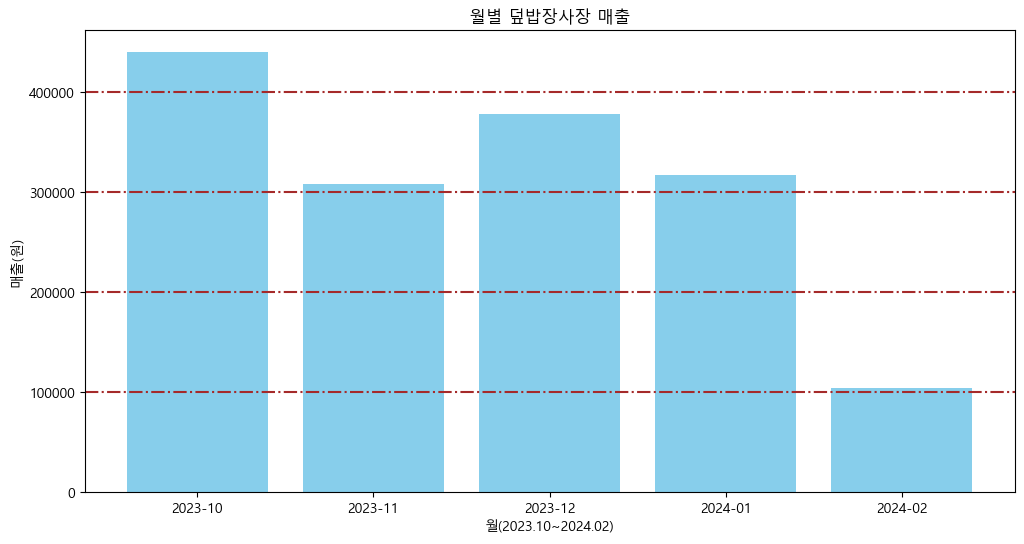

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(df_Jang_Month['사용일시'].dt.strftime('%Y-%m'), df_Jang_Month['승인금액'], color='skyblue')
plt.title('월별 덮밥장사장 매출')
plt.xlabel('월(2023.10~2024.02)')
plt.axhline(y=100000, color='brown', linestyle='-.', label='Horizontal Line')
plt.axhline(y=200000, color='brown', linestyle='-.', label='Horizontal Line')
plt.axhline(y=300000, color='brown', linestyle='-.', label='Horizontal Line')
plt.axhline(y=400000, color='brown', linestyle='-.', label='Horizontal Line')
plt.ylabel('매출(원)')
plt.show()


In [18]:
couponData['사용시간'] = couponData['사용시간'].astype(str)
couponData['시간'] = couponData['사용시간'].str[0:2]
couponData['부정사용'] = np.where((couponData['시간'] < '08') | (couponData['시간'] >= '20'), True, False)
couponData.head()

,사용일시,사용시간,가맹점,가맹점업종,승인금액,식권,시간,부정사용
0,2023-10-04,11:57:13,미스사이공 고덕푸르지오점,한식 음식점업,7000,새싹강동,11,False
1,2023-10-04,11:57:43,버거타임(BURGER TIME),양식,8000,새싹강동,11,False
2,2023-10-04,11:58:29,버거타임(BURGER TIME),양식,8000,새싹강동,11,False
3,2023-10-04,11:58:31,미스사이공 고덕푸르지오점,한식 음식점업,8000,새싹강동,11,False
4,2023-10-04,11:58:44,버거타임(BURGER TIME),양식,8000,새싹강동,11,False


In [19]:
# "부정사용" 컬럼의 값이 True인 데이터를 출력
couponData[couponData['부정사용'] == True].head()

,사용일시,사용시간,가맹점,가맹점업종,승인금액,식권,시간,부정사용
115,2023-10-11,02:43:27,GS25강일리버점,편의점,7000,새싹강동,02,True
239,2023-10-16,22:41:02,GS25 강일9단지점,편의점,1000,새싹강동,22,True
297,2023-10-19,02:05:53,GS25강일리버점,편의점,8000,새싹강동,02,True
355,2023-10-20,21:56:16,GS25중구무학점,편의점,8000,새싹강동,21,True
385,2023-10-24,05:34:29,GS25강일리버점,편의점,6900,새싹강동,05,True


In [20]:
couponData['부정사용'].value_counts()

부정사용
False    2507
True       46
Name: count, dtype: int64